In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings; warnings.simplefilter('ignore')

In [18]:
rent_df=pd.read_csv("data/Rent_Data.csv")
rent_df.columns = ["Year", "Quarter", "LGA", "Dwelling Type", "Bedroom Number", 
                "First QNB", "Second QNB", "Third QNB", "NB Lodged", "TB Lodged", "Qtrly Median Change", 
                "Annly Median Change", "Qtrly NB", "Annly NB"]
rent_df.head()

,Year,Quarter,LGA,Dwelling Type,Bedroom Number,First QNB,Second QNB,Third QNB,NB Lodged,TB Lodged,Qtrly Median Change,Annly Median Change,Qtrly NB,Annly NB
0,2019,2,Albury,Total,Total,220,275,340,623.00,6095.00,-5.17%,1.85%,-16.93%,-5.03%
1,2019,2,Albury,Total,Bedsitter,-,-,-,-,-,-,-,-,-
2,2019,2,Albury,Total,1 Bedroom,165,178,200,50.00,496.00,1.43%,4.41%,-12.28%,11.11%
3,2019,2,Albury,Total,Not Specified,-,-,-,-,214.00,-,-,-,-
4,2019,2,Albury,Total,2 Bedrooms,190,235,265,255.00,2341.00,0.00%,2.17%,-5.56%,0.00%


In [19]:
rent_df = rent_df.replace("-", np.nan)

In [20]:
rent_df["First QNB"] = rent_df["First QNB"].astype(str).astype(float)
rent_df["Second QNB"] = rent_df["Second QNB"].astype(str).astype(float)
rent_df["Third QNB"] = rent_df["Third QNB"].astype(str).astype(float)

In [21]:
### NAN values are replaced with min-1 ###

f_min_val = np.min(rent_df["First QNB"]) - 1
s_min_val = np.min(rent_df["Second QNB"]) - 1
t_min_val = np.min(rent_df["Third QNB"]) - 1

In [22]:
null = []
for x in rent_df.index:#range(len(rent_df.index)):
    null_row = rent_df.loc[x].isnull().sum()
    if null_row == 9:
        null.append(x)
        rent_df.loc[x] = rent_df.loc[x].replace(np.nan, 0)

In [23]:
### NAN values are replaced with min-1 ###

rent_df["First QNB"] = rent_df["First QNB"].replace(np.nan, f_min_val)
rent_df["Second QNB"] = rent_df["Second QNB"].replace(np.nan, s_min_val)
rent_df["Third QNB"] = rent_df["Third QNB"].replace(np.nan, t_min_val)

In [24]:
### replace s  with 1 ###
rent_df = rent_df.replace("s", 1)
rent_df["NB Lodged"] = rent_df["NB Lodged"].astype(str).astype(float)
rent_df["TB Lodged"] = rent_df["TB Lodged"].astype(str).astype(float)

In [25]:
### NAN values are replaced with 0 ###
### s values which mean really small values are replaced with min/2 ###

fq_min_val = np.min(rent_df["NB Lodged"])
rent_df["NB Lodged"] = rent_df["NB Lodged"].replace(1, fq_min_val)/2
rent_df["NB Lodged"] = rent_df["NB Lodged"].replace(np.nan, 0)

sq_min_val = np.min(rent_df["TB Lodged"])
rent_df["TB Lodged"] = rent_df["TB Lodged"].replace(1, sq_min_val)/2
rent_df["TB Lodged"] = rent_df["TB Lodged"].replace(np.nan, 0)

In [26]:
### float to int ###
rent_df["NB Lodged"] = rent_df["NB Lodged"].astype(int)
rent_df["TB Lodged"] = rent_df["TB Lodged"].astype(int)

rent_df["First QNB"] = rent_df["First QNB"].astype(int)
rent_df["Second QNB"] = rent_df["Second QNB"].astype(int)
rent_df["Third QNB"] = rent_df["Third QNB"].astype(int)

In [27]:
### remove % sign ###
rent_df['Qtrly Median Change'] = rent_df['Qtrly Median Change'].astype(str).str.extract('(\d+)').astype(float)
rent_df['Annly Median Change'] = rent_df['Annly Median Change'].astype(str).str.extract('(\d+)').astype(float)
rent_df['Qtrly NB'] = rent_df['Qtrly NB'].astype(str).str.extract('(\d+)').astype(float)
rent_df['Annly NB'] = rent_df['Annly NB'].astype(str).str.extract('(\d+)').astype(float)

### replace nan values for the last 4 columns with 0 ###
rent_df = rent_df.replace(np.nan, 0)

In [28]:
price_df = rent_df[['LGA', 'Dwelling Type', 'Bedroom Number', 'First QNB', 'Second QNB', 'Third QNB']].copy()
price_df['mean'] = price_df.mean(axis=1)

In [29]:
rent_df['Mean QNB'] = np.nan
rent_df['Mean QNB'] = price_df['mean']
rent_df['Mean QNB'] = rent_df['Mean QNB'].astype(int)

In [41]:
top_LGA = rent_df.sort_values(by="Mean QNB", ascending = False)['LGA'].unique()[:10]
top_LGA

array(['Mosman', 'Woollahra', 'Waverley', 'North Sydney', 'Hunters Hill',
       'Northern Beaches', 'Total', 'Willoughby', 'Lane Cove', 'Randwick'],
      dtype=object)

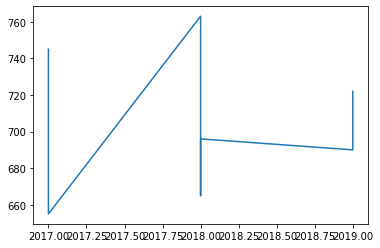

In [65]:
top_LGA_df = rent_df[rent_df['LGA']=='Mosman'].sort_values(by="Mean QNB", ascending = False)
top_LGA_df = top_LGA_df[top_LGA_df['Dwelling Type'] == 'Total']
top_LGA_df = top_LGA_df[top_LGA_df['Bedroom Number'] == 'Total']
top_LGA_df = top_LGA_df[top_LGA_df['Mean QNB'] != 59].sort_values(by=['Year', 'Quarter']) 
top_LGA_df['Year'] = top_LGA_df['Year'].astype(int)

plt.plot(top_LGA_df['Year'], top_LGA_df['Mean QNB'])
plt.show()

In [66]:
top_LGA_df

,Year,Quarter,LGA,Dwelling Type,Bedroom Number,First QNB,Second QNB,Third QNB,NB Lodged,TB Lodged,Qtrly Median Change,Annly Median Change,Qtrly NB,Annly NB,Mean QNB
33301,2017,3,Mosman,Total,Total,550,685,1000,196,2074,1.0,0.0,6.0,0.0,745
24236,2017,4,Mosman,Total,Total,510,607,850,194,1921,11.0,6.0,1.0,1.0,655
29416,2018,1,Mosman,Total,Total,560,680,1050,182,1926,11.0,4.0,5.0,3.0,763
26826,2018,2,Mosman,Total,Total,528,650,900,181,1924,4.0,3.0,0.0,13.0,692
32006,2018,3,Mosman,Total,Total,525,630,840,222,1946,3.0,8.0,22.0,13.0,665
25531,2018,4,Mosman,Total,Total,500,640,950,181,1971,1.0,5.0,18.0,6.0,696
30711,2019,1,Mosman,Total,Total,520,650,900,201,1978,1.0,4.0,10.0,10.0,690
28121,2019,2,Mosman,Total,Total,518,650,1000,195,1985,0.0,0.0,2.0,7.0,722


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(rent_df['LGA'].unique())
rent_df['LGA']=le.transform(rent_df['LGA']) 

le.fit(rent_df['Dwelling Type'].unique())
rent_df['Dwelling Type']=le.transform(rent_df['Dwelling Type']) 

le.fit(['Total', 'Bedsitter', '1 Bedroom', '2 Bedrooms', '3 Bedrooms', '4 or more Bedrooms', 'Not Specified'])
rent_df['Bedroom Number']=le.transform(rent_df['Bedroom Number']) 

In [ ]:
%run scripts/PearsonValue.py

In [ ]:
g = sns.pairplot(rent_df,
             vars = ['LGA', 'First QNB', 'Second QNB', 'Third QNB', 'Mean QNB'],
             palette = 'husl',
             diag_kind = 'kde',
             diag_kws=dict(shade=True))

g.map_upper(corr)
g.map_lower(sns.regplot, line_kws = {'color':'red'})
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

cols = np.array(['LGA', 'First QNB', 'Second QNB', 'Third QNB'])
X = rent_df[cols]
y = rent_df['Mean QNB']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy in training set: {: .3f}". format(tree.score(X_train, y_train)))
print("Accuracy in testing set: {: .3f}". format(tree.score(X_test, y_test)))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)

print("Accuracy in training set: {: .3f}". format(forest_model.score(X_train, y_train)))
print("Accuracy in testing set: {: .3f}". format(forest_model.score(X_test, y_test)))

In [ ]:
clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(X_train,y_train)

print("Accuracy in training set: {: .3f}". format(clf_entropy.score(X_train, y_train)))
print("Accuracy in testing set: {: .3f}". format(clf_entropy.score(X_test, y_test)))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print("Accuracy in training set: {: .3f}". format(svc.score(X_train, y_train)))
print("Accuracy in testing set: {: .3f}". format(svc.score(X_test, y_test)))